<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Final Project: Classification with Python</font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="https://#Section_1">Instructions</a></li>
    <li><a href="https://#Section_2">About the Data</a></li>
    <li><a href="https://#Section_3">Importing Data </a></li>
    <li><a href="https://#Section_4">Data Preprocessing</a> </li>
    <li><a href="https://#Section_5">Transforming Categorical Variables </a></li>
    <li><a href="https://#Section_6">Train and Test Data Split </a></li>
    <li><a href="https://#Section_7">Train Linear Regression, KNN, Decision Tree, Logistic Regression, and SVM models and return their appropriate accuracy scores</a></li>
</a></li>
</div>
<p>Estimated Time Needed: <strong>180 min</strong></p>
</div>

<hr>


# Instructions


In this notebook, you will  practice all the classification algorithms that we learned in this course.

After completing this notebook, you will need to upload it to the "Submit Your Work and Review Your Peers" section of the Final Project module.

Below, is where we are going to use the classification algorithms to create a model based on our training data and evaluate our testing data using evaluation metrics learned in the course.

We will use some of the algorithms taught in the course, specifically:

1.  Linear Regression
2.  KNN
3.  Decision Trees
4.  Logistic Regression
5.  SVM

We will evaluate our models using:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error
6.  Mean Squared Error
7.  R2-Score

Finally, you will use your models to generate the report displaying the accuracy scores.


# About The Dataset


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)


This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RISK_MM       | Amount of rain tomorrow                               | Millimeters     | float  |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)


## **Import the required libraries**


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

### Importing the Dataset


In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv')

df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### Data Preprocessing


#### Transforming Categorical Variables


First, we need to convert categorical variables to binary variables. We will use pandas `get_dummies()` method for this.


In [4]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [5]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

### Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.


In [6]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [7]:
df_sydney_processed = df_sydney_processed.astype(float)

In [8]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

### Linear Regression


#### Q1) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.


In [9]:
#Enter Your Code, Execute and take the Screenshot


In [10]:
x_train, x_test, y_train, y_test = train_test_split(features,Y,
                        test_size=0.2,stratify=Y,random_state=10)

In [11]:
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (2616, 66) (2616,)
Test set: (655, 66) (655,)


#### Q2) Create and train a Linear Regression model called LinearReg using the training data (`x_train`, `y_train`).


In [15]:
#Enter Your Code, Execute and take the Screenshot
from sklearn import linear_model
LinearReg = linear_model.LinearRegression()
LinearReg.fit(x_train,y_train)


LinearRegression()

In [14]:
LinearReg 

LinearRegression()

#### Q3) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [17]:
predictions = LinearReg.predict(x_test)

#### Q4) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [20]:
#Enter Your Code, Execute and take the Screenshot
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , predictions) )

Mean absolute error: 0.26
Residual sum of squares (MSE): 0.13
R2-score: 0.34


In [23]:
LinearRegression_MAE =  np.mean(np.absolute(predictions - y_test))
LinearRegression_MSE =  np.mean((predictions - y_test) ** 2)
LinearRegression_R2 =  r2_score(y_test , predictions) 

#### Q5) Show the MAE, MSE, and R2 in a tabular format using data frame for the linear model.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [33]:
import pandas as pd
dict_try={'LinearRegression_MAE':LinearRegression_MAE,
         'LinearRegression_MSE':LinearRegression_MSE,
         'LinearRegression_R2':LinearRegression_R2}
Report = pd.DataFrame([dict_try])
Report


,LinearRegression_MAE,LinearRegression_MSE,LinearRegression_R2
0,0.261358,0.127619,0.335938


### KNN


#### Q6) Create and train a KNN model called KNN using the training data (`x_train`, `y_train`) with the `n_neighbors` parameter set to `4`.


In [44]:
#Enter Your Code, Execute and take the Screenshot
X_train, X_test, y_train, y_test = train_test_split( features, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2616, 66) (2616,)
Test set: (655, 66) (655,)


In [45]:
k=4
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

#### Q7) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [47]:
predictions = KNN.predict(X_test)


#### Q8) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [48]:
#Enter Your Code, Execute and take the Screenshot
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, KNN.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, predictions))

Train set Accuracy:  0.8555045871559633
Test set Accuracy:  0.8213740458015267


In [49]:
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.82      0.96      0.89       472
         1.0       0.81      0.48      0.60       183

    accuracy                           0.82       655
   macro avg       0.82      0.72      0.74       655
weighted avg       0.82      0.82      0.80       655



In [ ]:
KNN_Accuracy_Score = 
KNN_JaccardIndex = 
KNN_F1_Score = 

### Decision Tree


#### Q9) Create and train a Decision Tree model called Tree using the training data (`x_train`, `y_train`).


In [50]:
#Enter Your Code, Execute and take the Screenshot
X_trainset, X_testset, y_trainset, y_testset = train_test_split(features, Y, test_size=0.3, random_state=3)

In [51]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [53]:
Tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#### Q10) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [55]:
predictions =  Tree.predict(X_testset)
predictions 

array([0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0.

#### Q11) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [57]:
#Enter Your Code, Execute and take the Screenshot
print (classification_report(y_testset, predictions))

              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89       719
         1.0       0.78      0.46      0.58       263

    accuracy                           0.82       982
   macro avg       0.80      0.71      0.73       982
weighted avg       0.81      0.82      0.80       982



In [ ]:
Tree_Accuracy_Score = 
Tree_JaccardIndex = 
Tree_F1_Score = 

### Logistic Regression


#### Q12) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `1`.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [34]:
x_train, x_test, y_train, y_test = train_test_split(features,Y,test_size=0.2,stratify=Y,random_state=1)

#### Q13) Create and train a LogisticRegression model called LR using the training data (`x_train`, `y_train`) with the `solver` parameter set to `liblinear`.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [35]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

#### Q14) Now, use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [36]:
predictions = LR.predict(x_test)

In [37]:
predictions

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0.

#### Q15) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [38]:
yhat=predictions
yhat_prob=LR.predict_proba(x_test)

In [39]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7985865724381626

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 89  81]
 [ 33 452]]


Confusion matrix, without normalization
[[ 89  81]
 [ 33 452]]


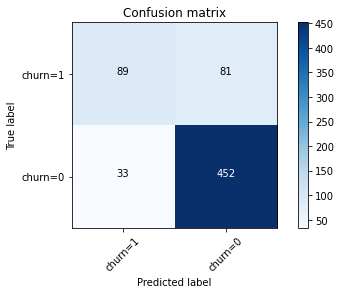

In [41]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [42]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89       485
         1.0       0.73      0.52      0.61       170

    accuracy                           0.83       655
   macro avg       0.79      0.73      0.75       655
weighted avg       0.82      0.83      0.82       655



In [ ]:
LR_Accuracy_Score = 
LR_JaccardIndex = 
LR_F1_Score = 
LR_Log_Loss = 

### SVM


#### Q16) Create and train a SVM model called SVM using the training data (`x_train`, `y_train`).


In [58]:
#Enter Your Code, Execute and take the Screenshot
X_train, X_test, y_train, y_test = train_test_split( features, Y, test_size=0.2, random_state=4)
SVM = svm.SVC(kernel='rbf')
SVM.fit(X_train, y_train) 

SVC()

In [59]:
SVM 

SVC()

#### Q17) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [60]:
predictions = SVM.predict(X_test)

#### Q18) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [61]:
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.72      1.00      0.84       472
         1.0       0.00      0.00      0.00       183

    accuracy                           0.72       655
   macro avg       0.36      0.50      0.42       655
weighted avg       0.52      0.72      0.60       655



In [ ]:
SVM_Accuracy_Score = 
SVM_JaccardIndex = 
SVM_F1_Score = 

### Report


#### Q19) Show the Accuracy,Jaccard Index,F1-Score and LogLoss in a tabular format using data frame for all of the above models.

\*LogLoss is only for Logistic Regression Model


Confusion matrix, without normalization
[[  0 183]
 [  0 472]]


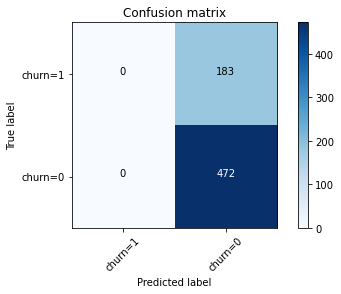

In [62]:
#Enter Your Code, Execute and take the Screenshot
cnf_matrix = confusion_matrix(y_test, predictions, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [ ]:
Report = 

<h2 id="Section_5">  How to submit </h2>

<p>Once you complete your notebook you will have to share it. You can download the notebook by navigating to "File" and clicking on "Download" button.

<p>This will save the (.ipynb) file on your computer. Once saved, you can upload this file in the "My Submission" tab, of the "Peer-graded Assignment" section.  


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

### Other Contributors

<a href="https://www.linkedin.com/in/birlahimanshu/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">Himanshu Birla</a>


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description          |
| ----------------- | ------- | ------------- | --------------------------- |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab         |
| 2022-06-22        | 2.0     | Lana K.       | Deleted GridSearch and Mock |
| <hr>              |         |               |                             |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
